# Data Loading & Read Clean File

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

# Import general library
import numpy as np # linear algebra
from numpy import sqrt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from datetime import date, timedelta
from matplotlib import pyplot

# Import sklearn model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

# Import statsmodels
from statsmodels.tsa.api import SimpleExpSmoothing 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

import warnings
warnings.filterwarnings('ignore')

# Import other modelling module
from fbprophet import Prophet

In [2]:
# Import Data

sample_submission = pd.read_csv('../data_local/sample_submission.csv')
test_input = pd.read_csv('../data_local/test.csv')
normData = pd.read_csv('predictFutureSalesClean.csv')
normData_No_Exclude = pd.read_csv('predictFutureSalesClean_No_Exclude_Item.csv')

In [3]:
normData

,Unnamed: 0,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,Required,item_category_name,date_month,date_year,total_sales
0,0,2013-01-02,0,59,22154,999.0,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,True,Кино - Blu-Ray,1,2013,999.0
1,1,2013-01-03,0,25,2574,399.0,2.0,"Москва ТРК ""Атриум""",DEL REY LANA Born To Die The Paradise Editio...,55,True,Музыка - CD локального производства,1,2013,798.0
2,2,2013-01-05,0,25,2574,399.0,1.0,"Москва ТРК ""Атриум""",DEL REY LANA Born To Die The Paradise Editio...,55,True,Музыка - CD локального производства,1,2013,399.0
3,3,2013-01-07,0,25,2574,399.0,1.0,"Москва ТРК ""Атриум""",DEL REY LANA Born To Die The Paradise Editio...,55,True,Музыка - CD локального производства,1,2013,399.0
4,4,2013-01-08,0,25,2574,399.0,2.0,"Москва ТРК ""Атриум""",DEL REY LANA Born To Die The Paradise Editio...,55,True,Музыка - CD локального производства,1,2013,798.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442559,1442559,2015-10-10,33,25,7409,299.0,1.0,"Москва ТРК ""Атриум""",V/A Nu Jazz Selection (digipack),55,True,Музыка - CD локального производства,10,2015,299.0
1442560,1442560,2015-10-09,33,25,7460,299.0,1.0,"Москва ТРК ""Атриум""",V/A The Golden Jazz Collection 1 2CD,55,True,Музыка - CD локального производства,10,2015,299.0
1442561,1442561,2015-10-14,33,25,7459,349.0,1.0,"Москва ТРК ""Атриум""",V/A The Best Of The 3 Tenors,55,True,Музыка - CD локального производства,10,2015,349.0
1442562,1442562,2015-10-22,33,25,7440,299.0,1.0,"Москва ТРК ""Атриум""",V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,True,Музыка - MP3,10,2015,299.0


In [4]:
# get rid of Unname column
normData.drop(normData.filter(regex="Unname"),axis=1, inplace=True)
normData

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,Required,item_category_name,date_month,date_year,total_sales
0,2013-01-02,0,59,22154,999.0,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,True,Кино - Blu-Ray,1,2013,999.0
1,2013-01-03,0,25,2574,399.0,2.0,"Москва ТРК ""Атриум""",DEL REY LANA Born To Die The Paradise Editio...,55,True,Музыка - CD локального производства,1,2013,798.0
2,2013-01-05,0,25,2574,399.0,1.0,"Москва ТРК ""Атриум""",DEL REY LANA Born To Die The Paradise Editio...,55,True,Музыка - CD локального производства,1,2013,399.0
3,2013-01-07,0,25,2574,399.0,1.0,"Москва ТРК ""Атриум""",DEL REY LANA Born To Die The Paradise Editio...,55,True,Музыка - CD локального производства,1,2013,399.0
4,2013-01-08,0,25,2574,399.0,2.0,"Москва ТРК ""Атриум""",DEL REY LANA Born To Die The Paradise Editio...,55,True,Музыка - CD локального производства,1,2013,798.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442559,2015-10-10,33,25,7409,299.0,1.0,"Москва ТРК ""Атриум""",V/A Nu Jazz Selection (digipack),55,True,Музыка - CD локального производства,10,2015,299.0
1442560,2015-10-09,33,25,7460,299.0,1.0,"Москва ТРК ""Атриум""",V/A The Golden Jazz Collection 1 2CD,55,True,Музыка - CD локального производства,10,2015,299.0
1442561,2015-10-14,33,25,7459,349.0,1.0,"Москва ТРК ""Атриум""",V/A The Best Of The 3 Tenors,55,True,Музыка - CD локального производства,10,2015,349.0
1442562,2015-10-22,33,25,7440,299.0,1.0,"Москва ТРК ""Атриум""",V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,True,Музыка - MP3,10,2015,299.0


## QC dataframe for 1 top sales item

In [20]:
norm_6675= normData.loc[(normData['item_id']==6675)]
norm_6675

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,Required,item_category_name,date_month,date_year,total_sales
266278,2013-11-29,10,28,6675,18380.243902,41.0,"Москва ТЦ ""МЕГА Теплый Стан"" II",Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,12,True,Игровые консоли - PS4,11,2013,753589.999998
266279,2013-11-30,10,28,6675,18240.000000,4.0,"Москва ТЦ ""МЕГА Теплый Стан"" II",Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,12,True,Игровые консоли - PS4,11,2013,72960.000000
267967,2013-11-29,10,30,6675,18087.560976,41.0,"Москва ТЦ ""Перловский""",Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,12,True,Игровые консоли - PS4,11,2013,741590.000000
267968,2013-11-30,10,30,6675,18323.333333,3.0,"Москва ТЦ ""Перловский""",Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,12,True,Игровые консоли - PS4,11,2013,54970.000000
268624,2013-11-29,10,29,6675,18162.413793,29.0,"Москва ТЦ ""Новый век"" (Новокосино)",Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,12,True,Игровые консоли - PS4,11,2013,526710.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351376,2015-09-06,32,39,6675,24392.000000,1.0,"РостовНаДону ТРК ""Мегацентр Горизонт""",Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,12,True,Игровые консоли - PS4,9,2015,24392.000000
1352474,2015-09-05,32,38,6675,24392.000000,1.0,"Омск ТЦ ""Мега""",Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,12,True,Игровые консоли - PS4,9,2015,24392.000000
1389455,2015-09-05,32,28,6675,24392.000000,1.0,"Москва ТЦ ""МЕГА Теплый Стан"" II",Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,12,True,Игровые консоли - PS4,9,2015,24392.000000
1401616,2015-10-10,33,39,6675,25991.000000,1.0,"РостовНаДону ТРК ""Мегацентр Горизонт""",Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,12,True,Игровые консоли - PS4,10,2015,25991.000000


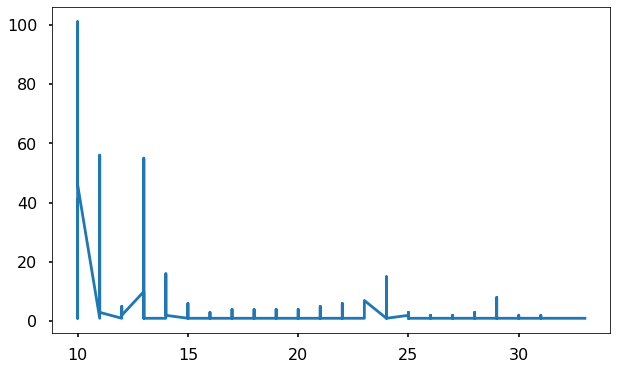

In [297]:
# Visualize the data
plt.figure(figsize=(10,6))

x= norm_6675['date_block_num']
y= norm_6675['item_cnt_day']

plt.plot(x,y)
plt.show()

# Data Decomposition (General)

In [6]:
# Only keep date & item_cnt_day
Forecast_IP = normData[['date','item_cnt_day']]
Forecast_IP['date'] = pd.to_datetime(Forecast_IP['date'])
# Set date as index
Forecast_IP = Forecast_IP.set_index('date')
## Select time period for weekly aggregation
Forecast_IP_weekly = Forecast_IP['2013-01-01':'2015-10-31'].resample('W').sum()
Forecast_IP_weekly

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,item_cnt_day
date,
2013-01-06,7891.0
2013-01-13,6505.0
2013-01-20,5755.0
2013-01-27,6125.0
2013-02-03,5551.0
...,...
2015-10-04,17857.0
2015-10-11,12808.0
2015-10-18,14922.0


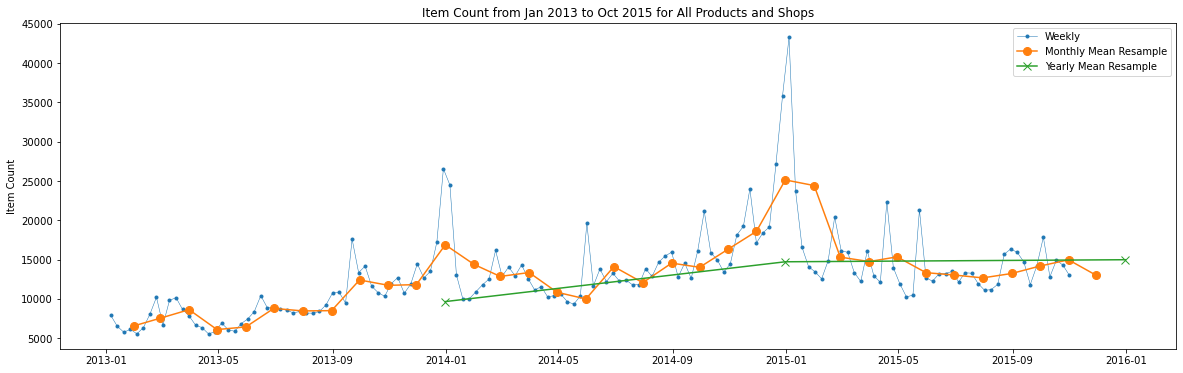

In [7]:
y = Forecast_IP_weekly['item_cnt_day']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.plot(y.resample('Y').mean(),marker='x', markersize=8, linestyle='-', label='Yearly Mean Resample')
ax.set_ylabel('Item Count')
ax.set_title('Item Count from Jan 2013 to Oct 2015 for All Products and Shops')
ax.legend();

In [8]:
import statsmodels.api as sm

# graphs to show seasonal_decompose
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

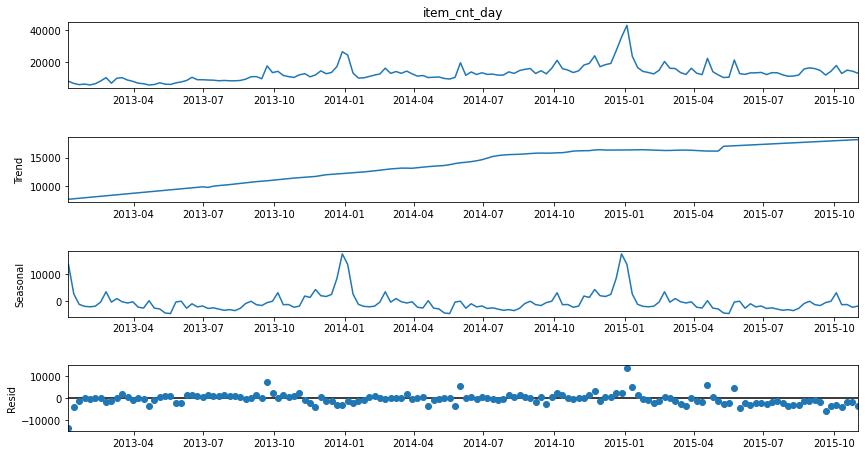

In [9]:
seasonal_decompose(y)

From observation from the four component, we can see the sales trend increasing from 2013 to 2015. 
The seasonal peak is 2014 & 2015 January. Seasonality and trend observed.

# Data Decomposition (Categorize by Item Category ID)

In [59]:
normData_filtered = normData[['date','item_cnt_day','item_category_id']]

In [61]:
#create unique list of names
UniqueNames = normData_filtered.item_category_id.unique()

#create a data frame dictionary to store your data frames
df = {elem : pd.DataFrame for elem in UniqueNames}

for key in df.keys():
    df[key] = normData_filtered[:][normData_filtered.item_category_id == key]

In [62]:
count=0
for elem in df:
    count+=1
print('Total Item Category is {}'.format(count))

Total Item Category is 60


In [63]:
# Only keep date & item_cnt_day
Forecast_IP_item20 = df[20][['date','item_cnt_day']]
Forecast_IP_item20['date'] = pd.to_datetime(Forecast_IP_item20['date'])
# Set date as index
Forecast_IP_item20 = Forecast_IP_item20.set_index('date')
## Select time period for weekly aggregation
Forecast_IP_item20_weekly = Forecast_IP_item20['2013-01-01':'2015-10-31'].resample('W').sum()
Forecast_IP_item20_weekly

,item_cnt_day
date,
2013-11-24,65.00000000
2013-12-01,1680.00000000
2013-12-08,725.00000000
2013-12-15,453.00000000
2013-12-22,792.00000000
...,...
2015-10-04,941.00000000
2015-10-11,1233.00000000
2015-10-18,1436.00000000


In [10]:
## Validate the start date of item category 20
df_validate = normData.loc[normData['item_category_id']==20]
df_validate= df_validate.sort_values(by='date')
df_validate

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,Required,item_category_name,date_month,date_year,total_sales
288906,2013-11-22,10,56,4271,2799.0,1.0,"Чехов ТРЦ ""Карнавал""","Knack [PS4, русская версия]",20,True,Игры - PS4,11,2013,2799.0
269326,2013-11-22,10,26,4231,2518.9,2.0,"Москва ТЦ ""Ареал"" (Беляево)","Killzone: В плену сумрака [PS4, русская версия]",20,True,Игры - PS4,11,2013,5037.8
274310,2013-11-22,10,31,4271,2799.0,1.0,"Москва ТЦ ""Семеновский""","Knack [PS4, русская версия]",20,True,Игры - PS4,11,2013,2799.0
269338,2013-11-22,10,26,4271,2799.0,2.0,"Москва ТЦ ""Ареал"" (Беляево)","Knack [PS4, русская версия]",20,True,Игры - PS4,11,2013,5598.0
289768,2013-11-22,10,54,4231,2799.0,2.0,"Химки ТЦ ""Мега""","Killzone: В плену сумрака [PS4, русская версия]",20,True,Игры - PS4,11,2013,5598.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402785,2015-10-31,33,35,10202,1199.0,1.0,"Н.Новгород ТРЦ ""Фантастика""","Ведьмак 3: Дикая Охота - Дополнение ""Каменные ...",20,True,Игры - PS4,10,2015,1199.0
1404700,2015-10-31,33,57,7224,4499.0,1.0,"Якутск Орджоникидзе, 56",Uncharted: Натан Дрейк. Коллекция. Специальное...,20,True,Игры - PS4,10,2015,4499.0
1437795,2015-10-31,33,21,1586,5999.0,1.0,"Москва МТРЦ ""Афи Молл""","Assassin's Creed: Синдикат. Чаринг-Кросс [PS4,...",20,True,Игры - PS4,10,2015,5999.0
1420869,2015-10-31,33,18,7223,3999.0,2.0,"Красноярск ТЦ ""Июнь""","Uncharted: Натан Дрейк. Коллекция [PS4, русска...",20,True,Игры - PS4,10,2015,7998.0


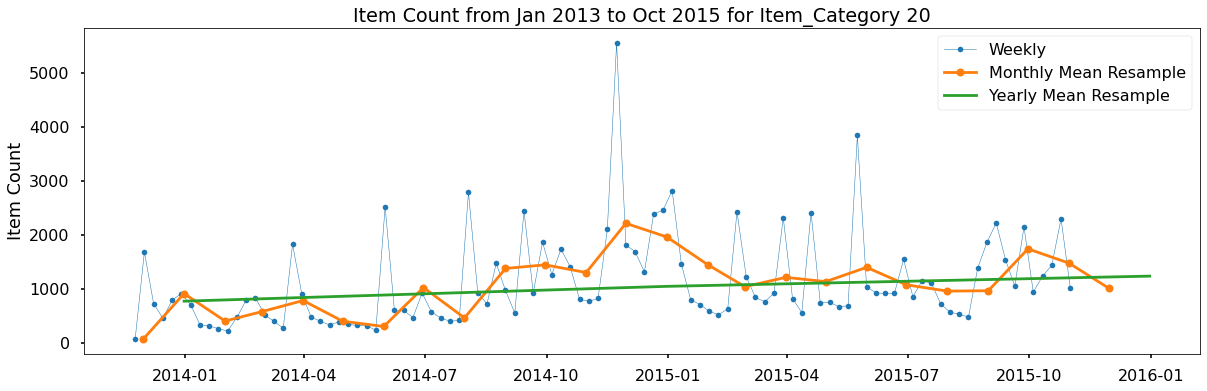

In [64]:
y = Forecast_IP_item20_weekly['item_cnt_day']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.plot(y.resample('Y').mean(),marker='x', markersize=8, linestyle='-', label='Yearly Mean Resample')
ax.set_ylabel('Item Count')
ax.set_title('Item Count from Jan 2013 to Oct 2015 for Item_Category 20')
ax.legend();

In [40]:
import statsmodels.api as sm

# graphs to show seasonal_decompose
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y,model='additive', freq=30)
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """


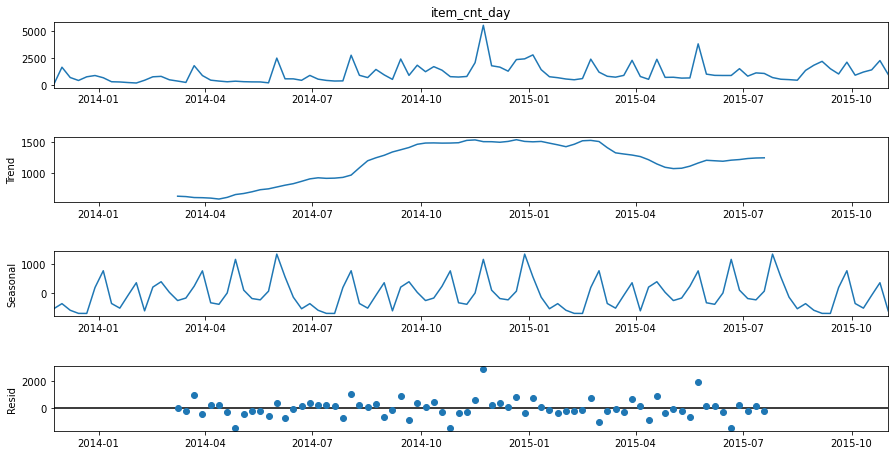

In [17]:
seasonal_decompose(y)

From observation, trend and  seasonality observed for item 20. 
Residual: also call noise, is the residual of original time series after seasonal and trend series are removed.

# Data Decomposition (Item ID)

In [21]:
norm_6675 = norm_6675[['date_block_num','item_cnt_day']]
norm_6675

,date_block_num,item_cnt_day
266278,10,41.0
266279,10,4.0
267967,10,41.0
267968,10,3.0
268624,10,29.0
...,...,...
1351376,32,1.0
1352474,32,1.0
1389455,32,1.0
1401616,33,1.0


In [22]:
norm_6675 = norm_6675.set_index('date_block_num')
norm_6675

,item_cnt_day
date_block_num,
10,41.0
10,4.0
10,41.0
10,3.0
10,29.0
...,...
32,1.0
32,1.0
32,1.0


In [23]:
import statsmodels.api as sm

# graphs to show seasonal_decompose
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y,model='additive', freq=30)
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

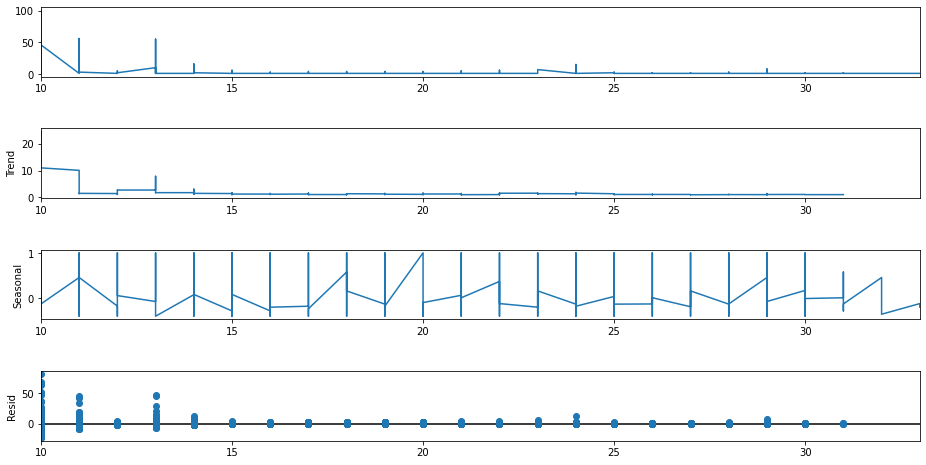

In [24]:
seasonal_decompose(norm_6675)

Monthly seasonality was observed in this example.

# Parameter Optimization for SARIMA & ARIMA

Before we start testing forecast modelling, we need to perform parameter optimization, to look for the optimum AR & MA term. We are using autogird search and ACF, ACF in this example.

## Autogrid search for SARIMA parameter

In [28]:
## Select popular item id for autogrid search
norm_6675

,item_cnt_day
date_block_num,
10,41.0
10,4.0
10,41.0
10,3.0
10,29.0
...,...
32,1.0
32,1.0
32,1.0


Parameters:

trend elements:
p: Trend autoregression order
d: Trend difference order
q: Trend moving average order

Seasonal Elements
P: Seasonal autoregressive order.
D: Seasonal difference order.
Q: Seasonal moving average order.
m: The number of time steps for a single seasonal period.

In order to get the best prediction, it’s important to find the values of SARIMA(p,d,q)(P,D,Q)m that optimize a metric of interest. In this example, we just use a "grid search" to iteratively explore different combinations of parameters.


Evaluation metric for this grid search is AIC (Akaike Information Criterion), that measure how well fit a model to overall model complexity. This help to choose the optimize parameterization for SARIMAX modelling with lowest AIC value.

AIC is an estimator to evaluate the relative quality of statistical models for given dataset. It provides means for model selection.

In [26]:
## Auto search function for SARIMAX function - check with one top sale item

import itertools

def sarima_grid_search(y,seasonal_period):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    
    mini = float('+inf')
    
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                
                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal

                print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue
    print('The set of parameters with the minimum AIC is: SARIMA{}x{} - AIC:{}'.format(param_mini, param_seasonal_mini, mini))

Our sample data has monthly seasonal pattern, and we aggregrated by day, so each data point is 1 day, so m=30

In [29]:
sarima_grid_search(norm_6675,30)

SARIMA(0, 0, 0)x(0, 0, 0, 30) - AIC:30727.813613711314
SARIMA(0, 0, 0)x(0, 0, 1, 30) - AIC:28595.135378668718
SARIMA(0, 0, 0)x(0, 1, 0, 30) - AIC:30977.656240988756
SARIMA(0, 0, 0)x(0, 1, 1, 30) - AIC:27584.362144881852
SARIMA(0, 0, 0)x(1, 0, 0, 30) - AIC:28360.474523496123
SARIMA(0, 0, 0)x(1, 0, 1, 30) - AIC:27943.707122039286
SARIMA(0, 0, 0)x(1, 1, 0, 30) - AIC:28233.350894399642
SARIMA(0, 0, 0)x(1, 1, 1, 30) - AIC:27356.464408555163
SARIMA(0, 0, 1)x(0, 0, 0, 30) - AIC:30335.741709573624
SARIMA(0, 0, 1)x(0, 0, 1, 30) - AIC:28343.64903417952
SARIMA(0, 0, 1)x(0, 1, 0, 30) - AIC:30952.72693485292
SARIMA(0, 0, 1)x(0, 1, 1, 30) - AIC:27418.912916581303
SARIMA(0, 0, 1)x(1, 0, 0, 30) - AIC:28293.461347066248
SARIMA(0, 0, 1)x(1, 0, 1, 30) - AIC:27891.755061267548
SARIMA(0, 0, 1)x(1, 1, 0, 30) - AIC:28187.751453218734
SARIMA(0, 0, 1)x(1, 1, 1, 30) - AIC:27256.629828521294
SARIMA(0, 1, 0)x(0, 0, 0, 30) - AIC:31870.9410867866
SARIMA(0, 1, 0)x(0, 0, 1, 30) - AIC:30169.415856698706
SARIMA(0, 1, 0

## ACF & PACF

Autocorrelation function (ACF) is the coefficient of correlation between two values in a time series. It is used to measure the association between an observation at time t and the observation at previous time spots [1]. The purposes are to detect non-randomness in data and find appropriate time series model if the data are not random [2]. Partial autocorrelation function (PACF) is an enhanced version of ACF by measure the association between an observation at time t and the observation at previous time spots by eliminating the existing linear influence [1]. 


In [34]:
# prep data for acf & pacf plot
#lag feature 

all_data = normData
all_data_by_day = all_data
aggregations = {'total_sales':'sum'}
all_data_by_day = all_data_by_day.groupby(['date'], as_index=False).agg(aggregations)
all_data_by_day['lag_1'] = all_data_by_day['total_sales'].shift(1)
all_data_by_day['lag_2'] = all_data_by_day['total_sales'].shift(2)
all_data_by_day['lag_3'] = all_data_by_day['total_sales'].shift(3)
all_data_by_day['lag_4'] = all_data_by_day['total_sales'].shift(4)
all_data_by_day['lag_5'] = all_data_by_day['total_sales'].shift(5)
all_data_by_day['lag_6'] = all_data_by_day['total_sales'].shift(6)
all_data_by_day['lag_7'] = all_data_by_day['total_sales'].shift(7)
all_data_by_day

,date,total_sales,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
0,2013-01-01,286395.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,1258654.76,286395.59,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-03,1131019.36,1258654.76,286395.59,NaN,NaN,NaN,NaN,NaN
3,2013-01-04,965669.29,1131019.36,1258654.76,286395.59,NaN,NaN,NaN,NaN
4,2013-01-05,955022.60,965669.29,1131019.36,1258654.76,286395.59,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1029,2015-10-27,2211635.13,1882246.16,3412849.00,4040446.00,6107958.00,2480586.00,2289480.0,2659223.8
1030,2015-10-28,1696390.10,2211635.13,1882246.16,3412849.00,4040446.00,6107958.00,2480586.0,2289480.0
1031,2015-10-29,1822707.40,1696390.10,2211635.13,1882246.16,3412849.00,4040446.00,6107958.0,2480586.0
1032,2015-10-30,2551906.12,1822707.40,1696390.10,2211635.13,1882246.16,3412849.00,4040446.0,6107958.0


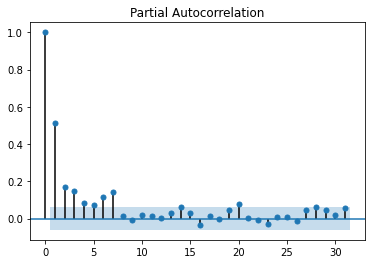

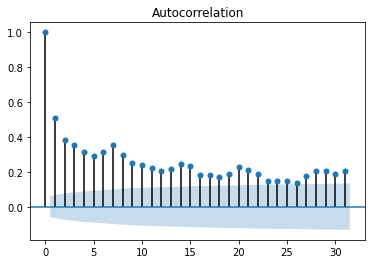

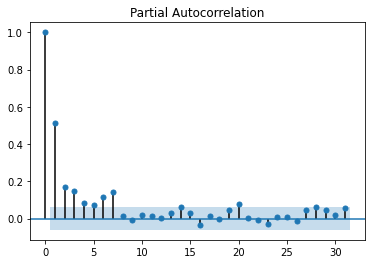

In [35]:
plot_acf(all_data_by_day['total_sales'])
plot_pacf(all_data_by_day['total_sales'])

The ACF & PACF plots helps to give intuition on Autoregressive(AR) and Moving Average (MA) term with a lag of k. The ACF & PACF plots above is showing the relationship of time series on total sales. From PACF plot, the correlation effect is strong at lag 1, and sharp decline afterwards.

This is tally with the autogrid search that we will apply both AR and MA term at lag 1.

# Modelling

In the modelling session, we are comparing different models to find the best prediction outcome for November sales.
As the input data is a time series data, we are working on both regression models, and forecast modelling.

1. Regression & Other Models
   - Ridge Regression
   - Lasso Regression
   - Decision Tree
   - Random Forest Regression
   - XGBoost
   
   
2. Forecast Modelling
    - SARIMA
    - ARIMA
    - FbProphet
    - Holt's Linear Trend Method
    - Holt-Winters' Seasonal Method
    

## Modelling Description

### Regression & Other Models

### Forecast Modelling

Here are the summary for each forecast model before the detail description:

ARIMA for data with trend but no seasonality

SARIMA for data with trend and/or seasonality

Holt’s Linear Trend Method for data with a trend but no seasonality

Holt-Winters’ Seasonal Method for data with trend and/or seasonality

In this section, we are comparing different forecast models for best future sales prediction in November. Since our input data is grouped by item id, and from the results after seasonal decomposition, we observed there are both trends and seasonality in the data. 

Theoretically we expect to have better result for models that taking both trends and seasonality into account, for example SARIMA, Holt-Winter's Seasonal Method.

#### SARIMA & ARIMA

Auto-Regressive Integrated Moving Average (ARIMA) models look at autocorrelations or partial autocorrelations in the data.It looks into the values difference in the timeseries yo predict the future trends. 

The main parameter in this model are Autoregression (AR) and Moving Average (MA). 

AR refer to the changing variables at its own lagged, or prior values (Chen, 2019). Normally, we could get the intuition of this value from the ACF plot. 

MA refer to dependency between an observation and a residual error from moving average model applied to lagged observation (Chen, 2019). Normally, we could get the intuition from the PACF plot. 

SARIMA is a concept build based on ARIMA. It extends to model the seasonal elements in data. 


#### FbProphet

This model is used for forecast based on additive model where non-linear trends fit with yearly, weekly, and daily seasonality, as well as the holiday effects.

It works best with time series that have strong seasonal effects and several seasons of historical data. It is typically handles outlier well. 

####  Holt’s Linear Trend Method


Holt method helps to forecast time series data that has a trend by expanding the SES method. SES method introduces level smooting parameter (α) and Holt methods introduces trend smoothing parameter (β*). 
Both parameters (α and β*) are in the range between 0 to 1. 

There are 2 Holt's model. 
1. Holt's additive model
2. Exponential model

Exponential model is not discussed in here as it is more appropriate for situations where the increase or decrease starts slowly at the beginning and then accelrates rapidly later. 

#### Holt-Winters' Seasonal Method

The Holt-Winters model extends from Holt Linear method to allow the forecasting of time series data that has both trend and seasonaility. This method introduces seasonality smoothing parameter: γ

There are 2 types of seasonality
1. Additive - Seasonal changes in the data stay roughly the same over time and don't fluctuate in relation to the overall data
2. Multiplicative - Seasonal variation changes in relation to the overal changes in the data. Thus, if the data is trending upward, the seasonal differences grow proportionally as well. 

As the seasonality of our data is additive, thus, we will only discuss additive seasonality here. 

## Training Models

To create and assess all of our models, we use a series of helper functions that perform the following functions. The code for all of the helper functions can be found here.

1. Train test split -  we separate our date to train test ratio 60% to 40%
2. Mean absolute percentage error -

In [5]:
# Data preprocessing for modelling
model_var = ['date', 'item_id', 'shop_id', 'item_cnt_day']
model_data = normData[model_var]
model_data = model_data.groupby(['date', 'item_id'])[['item_cnt_day']].sum().reset_index()
model_data

,date,item_id,item_cnt_day
0,2013-01-01,32,7.0
1,2013-01-01,33,2.0
2,2013-01-01,53,1.0
3,2013-01-01,59,2.0
4,2013-01-01,154,1.0
...,...,...,...
665800,2015-10-31,22102,6.0
665801,2015-10-31,22118,1.0
665802,2015-10-31,22139,1.0
665803,2015-10-31,22145,1.0


In [6]:
def data_split(data, ratio=None):
    if ratio == None:
        ratio = ratio
    
    train_size = int(len(data) * ratio)
    test_size = int(len(data))-train_size
    train, test = data.iloc[: train_size], data.iloc[train_size:]
    
    return train,test,train_size,test_size

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true+1e-6)) * 100
    
    if type(mape) == pd.Series: mape = mape[0]
        
    return mape

def metrics_score(original, predict, model=None):
    rmse = sqrt(mean_squared_error(original, predict))
    mae = mean_absolute_error(original, predict)
    mape = mean_absolute_percentage_error(original, predict)
    r2score = r2_score(original, predict)
        
    metrics = dict (MAE="{:.4f}".format(mae), MAPE="{:.4f}".format(mape), R2_Score="{:.4f}".format(r2score), RMSE="{:.4f}".format(rmse))
    
    return metrics

def pred_line_plot(orig_df, orig_y, pred_df, pred_y, forecast=True, conf=False, fc_conf=None, fc_date_min=None, fc_date_max=None, title=None):
    if forecast == True:
        dates = pd.date_range(start=pd.to_datetime(fc_date_min), 
                              end=pd.to_datetime(fc_date_max)+timedelta(days=30), freq='D')
        dates_df = pd.DataFrame(index=dates)
        orig_df = orig_df.append(dates_df)
    else:
        orig_df = orig_df
    
    fig, ax = plt.subplots(figsize=(15,5))

    plt.plot(pd.to_datetime(orig_df.index), orig_y, data=orig_df, color='skyblue', label='observed')
    plt.plot(pd.to_datetime(pred_df.index), pred_y, data=pred_df, color='olive', label='predicted')
    ax.fill_betweenx(ax.get_ylim(), pd.to_datetime(pred_df.index).min(), pd.to_datetime(pred_df.index).max(), alpha=.1, zorder=-1)
    
    if conf == True:
        ax.fill_between(fc_conf.index, fc_conf.iloc[:, 0], fc_conf.iloc[:, 1], color='k', alpha=.25)
    else:
        pass
    
    plt.title(title, fontsize=16, weight="bold")
    plt.ylabel("Item Count Data", fontsize=14)
    plt.xlabel("Date", fontsize=14)
    plt.legend(fontsize="12")
    plt.show()
    
    return plt

def stationarity_test(timeseries, critical_value=0.05):
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    t_stats = dftest[0]
    p_value = dftest[1]
    critical_value = critical_value
    
    return t_stats, p_value, critical_value

In [7]:
def forecast_model(data, model=None):  
    data = data.set_index('date')
    if "item_id" in data.columns:
        data = data[['item_cnt_day']]
  
    t_stats, p_value, critical_value = stationarity_test(data["item_cnt_day"], critical_value=0.05)
    if p_value <= critical_value:
        data["item_cnt_day"] = data["item_cnt_day"]
    elif p_value > critical_value:
        print("  Applying differencing as the series is not stationary ...")
        data["item_cnt_day"] = (data["item_cnt_day"]  - data["item_cnt_day"] .rolling(window=12).mean())/data["item_cnt_day"] .rolling(window=12).std()
        data["item_cnt_day"] = data["item_cnt_day"] - data["item_cnt_day"].shift(12)

    train, test, train_size, test_size = data_split(data, ratio=0.6)
    if train["item_cnt_day"].isnull().sum() > 0:
        print("  Interp [item_cnt_day] ...")
        train["item_cnt_day"] = train["item_cnt_day"].interpolate(limit_direction="both")
    dates = pd.date_range(start=pd.to_datetime(test.index.max()), 
                          end=pd.to_datetime(test.index.max())+timedelta(days=30), freq='D')
    prediction_list = []
    history = [x for x in train]
    
    # modelling
    if model == "SARIMAX":          
        model = SARIMAX(data,
                        order=(1,0,1),
                        seasonal_order=(1,1,1,30))
        model_fit = model.fit(disp=False)
        pref_fit = model_fit.get_prediction(start=test.index[0], dynamic=False)
        pred = pd.DataFrame(pref_fit.predicted_mean).rename(columns={'predicted_mean': 'item_cnt_day'})
        pred_ci = pref_fit.conf_int()

        forecast_fit = model_fit.get_forecast(steps=31)
        forecast = pd.DataFrame(forecast_fit.predicted_mean).rename(columns={'predicted_mean': 'item_cnt_day'})
        forecast = forecast.set_index(dates)
        forecast_conf = forecast_fit.conf_int()
        forecast_conf = forecast_conf.set_index(dates)
        
        history.append(test)
     
    elif model == "ARIMA":
        model = ARIMA(train, order=(1,0,1))
        model_fit = model.fit(disp=0)
        pred_num = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
        pred = pd.DataFrame(pred_num).rename(columns={0: 'item_cnt_day'})
        pred = pred.set_index(pd.to_datetime(test.index))

        fc, se, conf = model_fit.forecast(31, alpha=0.05)
        fc_series = pd.Series(fc, index=dates)
        forecast = pd.DataFrame(fc_series).rename(columns={0:'item_cnt_day'})
        lower_series = pd.Series(conf[:, 0], index=dates)
        upper_series = pd.Series(conf[:, 1], index=dates)
        forecast_conf = pd.concat([lower_series, upper_series], axis=1).rename(columns={0:'lower item_cnt_day', 1:'upper item_cnt_day'})
        forecast_conf = forecast_conf.set_index(dates)
        
        history.append(test)
        
    metrics = metrics_score(test, pred, model=model)
    metrics["p-value"] = "{:.4f}".format(p_value)
    if p_value <= critical_value:
        metrics["stationarity"] = 1
    elif p_value > critical_value:
        metrics["stationarity"] = 0 
        
    return history, train, test, pred, forecast, forecast_conf, metrics, model_fit

In [8]:
sample_id = [32, 33, 53, 59, 154, 500, 800, 857, 12796, 12808, 12839, 3000, 4577, 22102, 22118]

sample_model_data = model_data.loc[model_data['item_id'].isin(sample_id)]

In [9]:
metrics_df = pd.DataFrame()
pred_df = pd.DataFrame()
algorithms = ["SARIMAX","ARIMA"]

for algorithm in algorithms:
    print(algorithm)
    for item_id, data in sample_model_data.groupby(["item_id"]):
        print("Initiate modelling for Item: {}".format(item_id))
        history, train, test, pred, forecast, forecast_conf, metrics, model = forecast_model(data, model=algorithm)
        
        # Creating result df
        metrics["model"] = algorithm
        metrics["item_id"] = item_id
        metrics_df = metrics_df.append(metrics, ignore_index=True)

SARIMAX
Initiate modelling for Item: 32
Initiate modelling for Item: 33
Initiate modelling for Item: 53
Initiate modelling for Item: 59
Initiate modelling for Item: 154
Initiate modelling for Item: 800
Initiate modelling for Item: 3000
Initiate modelling for Item: 12796
Initiate modelling for Item: 12808
Initiate modelling for Item: 12839
Initiate modelling for Item: 22102
Initiate modelling for Item: 22118
  Applying differencing as the series is not stationary ...
  Interp [item_cnt_day] ...
ARIMA
Initiate modelling for Item: 32
Initiate modelling for Item: 33
Initiate modelling for Item: 53
Initiate modelling for Item: 59
Initiate modelling for Item: 154
Initiate modelling for Item: 800
Initiate modelling for Item: 3000
Initiate modelling for Item: 12796
Initiate modelling for Item: 12808
Initiate modelling for Item: 12839
Initiate modelling for Item: 22102
Initiate modelling for Item: 22118
  Applying differencing as the series is not stationary ...
  Interp [item_cnt_day] ...


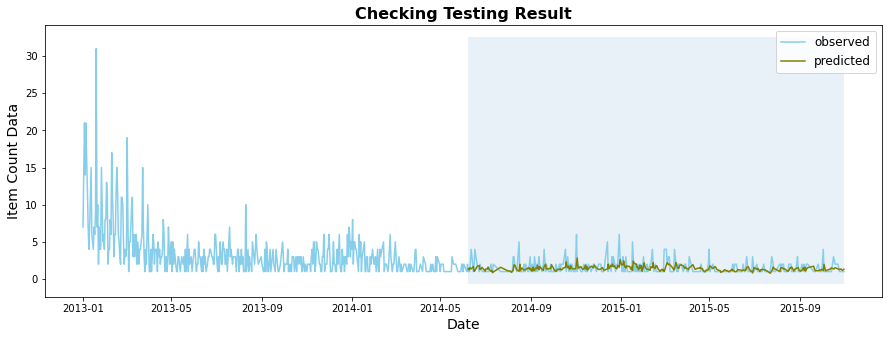

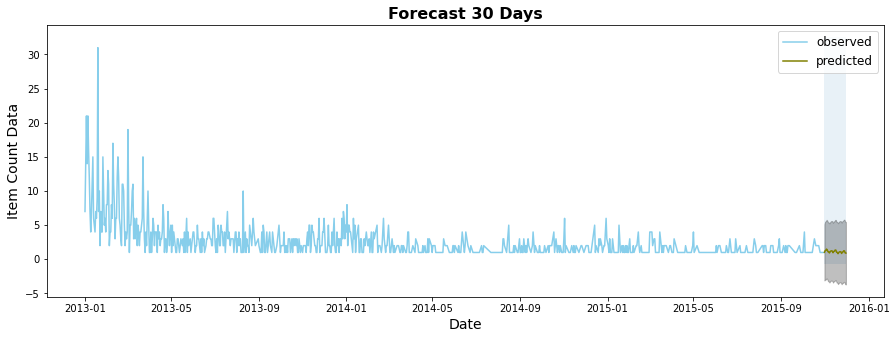

<module 'matplotlib.pyplot' from 'C:\\Users\\MLee27\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [16]:
sub_df = model_data.loc[model_data['item_id']==32]
sub_df = sub_df.drop(columns=['item_id'], axis=1)

history, train, test, pred, forecast, forecast_conf, metrics, model = forecast_model(sub_df, model="SARIMAX")
sub_df2 =sub_df.set_index('date') 

pred_line_plot(orig_df=sub_df.set_index('date'), 
               orig_y='item_cnt_day', 
               pred_df=pred, 
               pred_y='item_cnt_day',
               forecast=False,
               conf=False,
               fc_date_min=None,
               fc_date_max=None,
               title="Checking Testing Result")

pred_line_plot(orig_df=sub_df.set_index('date'),
               orig_y='item_cnt_day',
               pred_df=forecast, 
               pred_y='item_cnt_day',
               forecast=True,
               conf=True,
               fc_conf=forecast_conf,
               fc_date_min=test.index.min(),
               fc_date_max=test.index.max(),
               title="Forecast 30 Days")


In [11]:
metrics_df

,MAE,MAPE,R2_Score,RMSE,item_id,model,p-value,stationarity
0,0.7723,51.7735,-0.3475,1.0636,32.0,SARIMAX,0.0000,1.0
1,0.4372,32.0767,-0.2066,0.6112,33.0,SARIMAX,0.0000,1.0
2,0.2049,13.6832,-0.0609,0.4028,53.0,SARIMAX,0.0000,1.0
3,0.1830,15.9062,-1.0782,0.3070,59.0,SARIMAX,0.0000,1.0
4,0.2520,22.4619,-0.4229,0.3786,154.0,SARIMAX,0.0117,1.0
5,0.0000,0.0001,0.0000,0.0000,800.0,SARIMAX,0.0000,1.0
6,0.3267,26.5196,-0.3390,0.4418,3000.0,SARIMAX,0.0000,1.0
7,0.4973,36.2677,-0.0585,0.7022,12796.0,SARIMAX,0.0000,1.0
8,0.5003,31.4858,-0.2380,0.7568,12808.0,SARIMAX,0.0000,1.0
9,0.5649,48.5258,-0.5590,0.6724,12839.0,SARIMAX,0.0000,1.0


TypeError: object of type 'ARMAResultsWrapper' has no len()

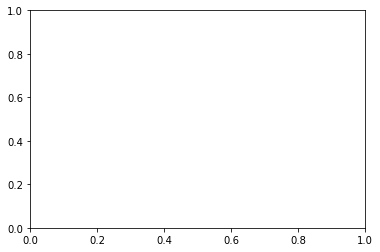

In [10]:
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [69]:
def rmse_level(rmse):
    if rmse <= 20:
        return 3
    elif (rmse > 20) & (rmse <= 100):
        return 2
    elif (rmse > 100):
        return 1
    else:
        return 0

In [70]:
metrics_df["rmse_level"] = metrics_df["RMSE"].apply(lambda x: rmse_level(x))

TypeError: '<=' not supported between instances of 'str' and 'int'

In [131]:
metrics_df

,MAE,MAPE,Model,R2_Score,RMSE,item_id,p-value,stationarity,rmse_level
0,3.662114,inf,SARIMAX,-3.358370,4.153148,3734.0,0.002656,1.0,3
1,6.219698,inf,SARIMAX,-4.743528,6.715538,6675.0,0.000576,1.0,3
2,6.453386,inf,ARIMA,-10.554250,6.762173,3734.0,0.002656,1.0,3
3,6.262260,inf,ARIMA,-4.423312,6.525650,6675.0,0.000576,1.0,3


In [65]:
## Prep for visualization
rmse_count_df = metrics_df.groupby("rmse_level").count()[['RMSE']].reset_index()
stationarity_count_df = metrics_df.groupby("stationarity").count()[['p-value']].reset_index()

In [66]:
rmse_count_df

,rmse_level,RMSE
0,1,4
1,3,1
